# Part 6 이차방정식 및 이차 함수 

## Chapter 1 고차방정식 해 - numpy의 root 

In [13]:
from __future__ import division
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction

In [14]:
np.roots([1,-3])

array([3.])

In [15]:
np.roots([5,-7])

array([1.4])

In [16]:
np.roots([3,-1,-2])

array([ 1.        , -0.66666667])

In [17]:
np.roots([1,6,8])

array([-4., -2.])

## Chapter 2 이차방정식 클래스

In [23]:
class StudentRecord:
    def __init__(self, name, email, phone):
        self.name = name
        self.email = email
        self.phone = phone
        temp = 0

In [24]:
a = StudentRecord()

TypeError: __init__() missing 3 required positional arguments: 'name', 'email', and 'phone'

In [25]:
student1 = StudentRecord('김똑똑', 'abc@gmail.com', '01011112222')
student2 = StudentRecord('박한별', 'efg@gmail.com', '01011113333')

In [26]:
student1.name

'김똑똑'

In [27]:
student1.temp

AttributeError: 'StudentRecord' object has no attribute 'temp'

In [28]:
class StudentRecord:
    def __init__(self, name, email, phone):
        self.name = name
        self.email = email
        self.phone = phone
    def math(self, score):
        self.math_score = score
    def english(self, score):
        self.english_score = score
    def show(self):
        print ('{}의 수학 성적은 {}, 영어 성적은 {}이다.'.format(self.name, self.math_score, self.english_score))
    def grade_both(self):
        if np.average([self.math_score, self.english_score]) >= 90:
            self.grade = 'A'
        elif np.average([self.math_score, self.english_score]) >= 80:
            self.grade = 'B'
        else:
            self.grade = 'C'
        return self.grade
    

In [29]:
student1 = StudentRecord('김똑똑', 'abc@gmail.com', '01011112222')
student2 = StudentRecord('박한별', 'efg@gmail.com', '01011113333')
student1.math(70)
student1.english(85)
student2.math(90)
student2.english(80)
student1.show()
student2.show()

김똑똑의 수학 성적은 70, 영어 성적은 85이다.
박한별의 수학 성적은 90, 영어 성적은 80이다.


In [30]:
print ('{}의 최종 성적은 {}'.format(student1.name, student1.grade_both()))
print ('{}의 최종 성적은 {}'.format(student2.name, student2.grade_both()))

김똑똑의 최종 성적은 C
박한별의 최종 성적은 B


## Chapter 3 이차방정식 
### 01 하나씩 대입해서 풀기

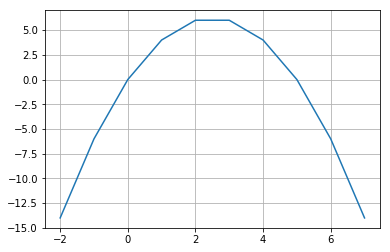

In [31]:
x = np.arange(-2, 8)
y = 5*x - x**2
plt.plot(x,y)
plt.grid()

In [32]:
for i in x:
    print ((i, 5*i-i**2))

(-2, -14)
(-1, -6)
(0, 0)
(1, 4)
(2, 6)
(3, 6)
(4, 4)
(5, 0)
(6, -6)
(7, -14)


In [33]:
x = np.arange(-2,3,1)

for i in x:
    if i**2 + i -2 == 0:
        print (i)

-2
1


x = -5, y = 33
x = -4, y = 21
x = -3, y = 11
x = -2, y = 3
x = -1, y = -3
x = 0, y = -7
x = 1, y = -9
x = 2, y = -9
x = 3, y = -7
x = 4, y = -3
x = 5, y = 3


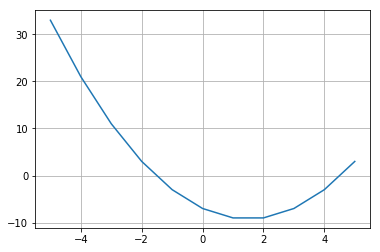

In [34]:
x = np.arange(-5,6,1)
y = x**2 - 3*x - 7
for i in x:
    print ('x = {}, y = {}'.format(i, i**2 - 3*i - 7))
plt.plot(x, y)
plt.grid()

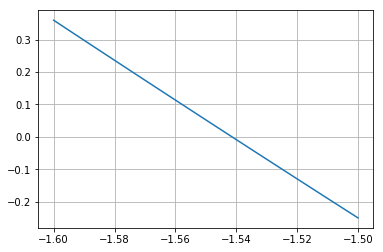

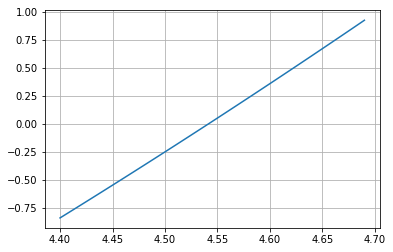

In [37]:
x = np.arange(-1.6,-1.5,0.01)
y = x**2 - 3*x - 7
#for i in x:
#    print ('x = {}, y = {}'.format(i, i**2 - 3*i - 7))
plt.plot(x, y)
plt.grid()

plt.figure()
x = np.arange(4.4,4.7,0.01)
y = x**2 - 3*x - 7
#for i in x:
#    print ('x = {}, y = {}'.format(i, i**2 - 3*i - 7))
plt.plot(x, y)
plt.grid()

#### 이차방정식 문제 생성기 만들기

In [38]:
class Second_order_eq:
    def __init__(self):
        print ('x = {-5 부터 5까지의 정수} 다음을 이차방정식의 문제를 푸시오.')
    def question(self):
        self.c, self.d = np.random.randint(low = -5, high = 5, size = 2)
        self.a = self.c + self.d
        self.b = self.c * self.d
        print ('x^2 + {}x + {} = 0'.format(self.a, self.b))
        
    def answer(self):
        print ('x = {}, {}'.format(-self.c, -self.d))

In [39]:
a = Second_order_eq()
a.question()

x = {-5 부터 5까지의 정수} 다음을 이차방정식의 문제를 푸시오.
x^2 + -1x + 0 = 0


In [40]:
a.answer()

x = 0, 1


### 02 인수분해해서 풀기

In [41]:
def factorization(a):
    b = range(1, a)
    c = []
    for i in b:
        if a % i ==0:
            c.append(i)
    c.append(a)
    return c

In [42]:
a_factor = factorization(6)
c_factor = factorization(21)

print (a_factor)
print (c_factor)

[1, 2, 3, 6]
[1, 3, 7, 21]


In [43]:
a_minus = list(map(lambda x: x*-1, a_factor))
c_minus = list(map(lambda x: x*-1, c_factor))
a_factor += a_minus
c_factor += c_minus

print (a_factor)
print (c_factor)

[1, 2, 3, 6, -1, -2, -3, -6]
[1, 3, 7, 21, -1, -3, -7, -21]


In [44]:
for d in a_factor:
    for e in c_factor:
        f = 6/d
        g = 21/e
        if d*g + e*f == 23:
            if d > 0 or e > 0:
                print ('6x^2 + 23x + 21 = ({}x + {})({}x + {})'.format(d,e,f,g))
                break

6x^2 + 23x + 21 = (2x + 3)(3.0x + 7.0)
6x^2 + 23x + 21 = (3x + 7)(2.0x + 3.0)


In [45]:
a_factor = factorization(1)
c_factor = factorization(32)

print (a_factor)
print (c_factor)

[1]
[1, 2, 4, 8, 16, 32]


In [46]:
a_minus = list(map(lambda x: x*-1, a_factor))
c_minus = list(map(lambda x: x*-1, c_factor))
a_factor += a_minus
c_factor += c_minus

print (a_factor)
print (c_factor)

[1, -1]
[1, 2, 4, 8, 16, 32, -1, -2, -4, -8, -16, -32]


In [47]:
for d in a_factor:
    for e in c_factor:
        f = 1/d
        g = 32/e
        if d*g + e*f == 12:
            if d > 0 or e > 0:
                print ('x^2 + 12x + 32 = ({}x + {})({}x + {})'.format(d,e,f,g))
                break

x^2 + 12x + 32 = (1x + 4)(1.0x + 8.0)


In [48]:
def decomposition(a,b,c):
    if c == 0:
        print ('x({}x+{})'.format(a, b))
    else:
        a_factor = factorization(a)
        c_factor = factorization(c)
        a_minus = list(map(lambda x: x*-1, a_factor))
        c_minus = list(map(lambda x: x*-1, c_factor))
        a_factor += a_minus
        c_factor += c_minus
        for d in a_factor:
            for e in c_factor:
                f = a/d
                g = c/e
                if d*g + e*f == b:
                    if d > 0 or e > 0:
                        print ('{}x^2 + {}x + {} = ({}x +{})({}x+{})'.format(a,b,c,d,e,f,g))
                        break
    #return i, j, ii, jj

In [49]:
decomposition(1,4,3)

1x^2 + 4x + 3 = (1x +1)(1.0x+3.0)


In [50]:
decomposition(1,-3,2)

1x^2 + -3x + 2 = (1x +-1)(1.0x+-2.0)
1x^2 + -3x + 2 = (-1x +1)(-1.0x+2.0)


In [51]:
decomposition(3,-3,0)

x(3x+-3)


In [52]:
decomposition(1,0,-1)

1x^2 + 0x + -1 = (1x +-1)(1.0x+1.0)
1x^2 + 0x + -1 = (-1x +1)(-1.0x+-1.0)


### 03 완전제곱식을 이용한 이차방정식 풀기

In [53]:
def second_order_direct(a,b,c):
    if b**2 - 4*a*c < 0:
        print ('No answer')
    else:
        x1 = (-b + np.sqrt(b**2 - 4*a*c)) / (2*a)
        x2 = (-b - np.sqrt(b**2 - 4*a*c)) / (2*a)
    return x1, x2

In [54]:
second_order_direct(1,-2,1)

(1.0, 1.0)

In [55]:
second_order_direct(3,-3,0)

(1.0, 0.0)

In [56]:
second_order_direct(4,0,-4)

(1.0, -1.0)

In [57]:
class Second_order:
    def __init__(self):
        print ('완전 제곱식을 이용하여 다음 이차방정식을 푸시오.')
    def question(self):
        self.d = 0
        self.f = 0
        while self.d == 0 or self.f == 0:
            self.d, self.e, self.f, self.g = np.random.randint(-5, 6, size = 4)
        self.a = self.d * self.f
        self.b = self.e * self.f + self.d * self.g
        self.c = self.e * self.g
        print ('{}x^2 + {}x + {} = 0'.format(self.a, self.b, self.c))
        
    def answer(self):
        if self.b**2 - 4*self.a*self.c < 0:
            print ('No answer')
        else:
            x1 = (-self.b + np.sqrt(self.b**2 - 4*self.a*self.c)) / (2*self.a)
            x2 = (-self.b - np.sqrt(self.b**2 - 4*self.a*self.c)) / (2*self.a)
        return x1, x2

In [58]:
a = Second_order()
a.question()

완전 제곱식을 이용하여 다음 이차방정식을 푸시오.
4x^2 + 6x + -4 = 0


In [59]:
a.answer()

(0.5, -2.0)

#### Question 6.1

$b^2 -4ac$을 계산하면

$4^2 - 4*3*(-3k+2) < 0$

$16 +36k - 24 < 0$

$36k - 8 < 0$

$k < \frac{2}{9} $

#### Question 6.2

두 근일 3b, 4b라 하면

$12b^2 = -12a$

$7b = 14$

b = 2

따라서 두 근은 6, 8이며 a는 -4

#### Question 6.3

$n^2 + n = 156$

In [60]:
np.roots([1,1,-156])

array([-13.,  12.])

## Chapter 4 이차 함수

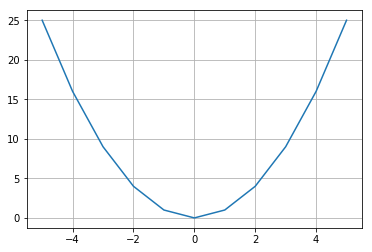

In [61]:
x = np.arange(-5,6)
y = x**2
plt.plot(x,y)
plt.grid()

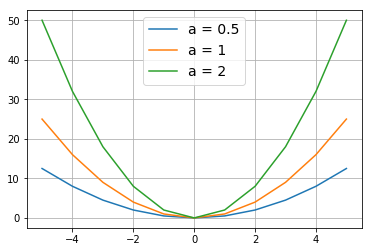

In [62]:
y2 = 2*x**2
y3 = 0.5*x**2
plt.plot(x,y3, label = 'a = 0.5')
plt.plot(x,y, label = 'a = 1')
plt.plot(x,y2, label = 'a = 2')
plt.legend(fontsize = 14)
plt.grid()

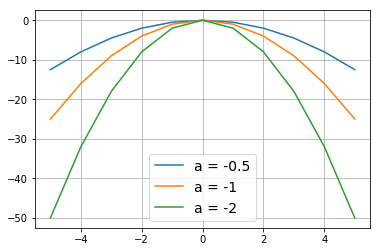

In [63]:
y2 = 2*x**2
y3 = 0.5*x**2
plt.plot(x,-y3, label = 'a = -0.5')
plt.plot(x,-y, label = 'a = -1')
plt.plot(x,-y2, label = 'a = -2')
plt.legend(fontsize = 14)
plt.grid()

## 이차함수의 $y = a(x-p)^2 + q$ 그래프 익히기

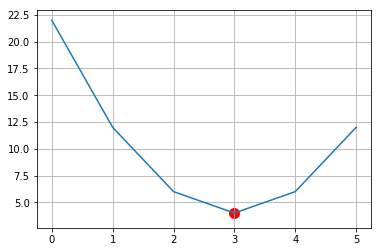

In [64]:
x = np.arange(6)
y = 2*(x-3)**2 + 4
plt.plot(x,y)
plt.scatter(3,4, s = 100, color = 'r')
plt.grid()

#### Question 6.4

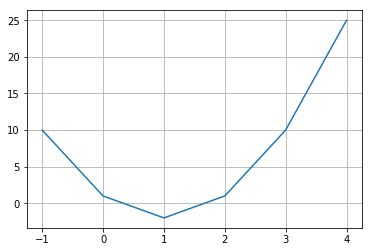

In [65]:
x = np.arange(-1,5)
y = 3*(x-1)**2 - 2
plt.plot(x,y)
plt.grid()

### 03 이차함수 $y = ax^2 + bx + c$ 그래프 익히기

$-5x^2 + 9x+2$

In [66]:
9**2 - (4*-5*2) >= 0

True

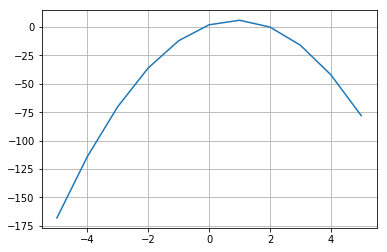

In [67]:
x = np.arange(-5,6)
y = -5*x**2 + 9*x + 2
plt.plot(x,y)
plt.grid()

#### Question 6.5

$y = \frac{-4}{3}x^2 + q$ 가 (-3, -17)을 지나야 한다.

-3을 대입하면

-12 + q = -17

따라서 q = -5

#### Question 6.6

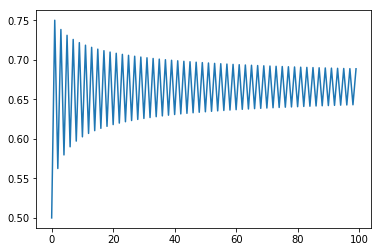

In [68]:
x = [0.5]
n = 100
for i in range(n):
    x.append(3*x[-1]*(1-x[-1]))
plt.plot(range(n), x[:-1])

#### Question 6.7

해답1)

AA = 11x

$AA^2 = 121 \times x^2$

$121 \times x^2 = 1100 \times y + 11 \times z$ 

$y = x-1$

$ z = x/2 $

따라서

$121 \times x^2 = 1100 (x-1) + 11(x/2)$ 

$121x^2 - 1100x - 5.5x + 1100 = 0 $

In [69]:
np.roots([121, -1105.5, 1100])

array([8.        , 1.13636364])

따라서 A = 88

해답2)

In [70]:
AA = np.arange(11, 100, 11)
print (AA)
for i in AA:
    if len(str(i**2)) == 4:
        if (int(str(i**2)[:2])/11) == (i/11 - 1):
            if (int(str(i**2)[2:])/11) == (i/11/2):
                print (i)

[11 22 33 44 55 66 77 88 99]
88


#### Question 6.8

$x(x+1) = 1122$

In [71]:
np.roots([1,1,-1122])

array([-34.,  33.])

33, 34p 이다.

#### Question 6.9


$a(x+1)(x-5) = 0$

$a \times 1 \times -5 = 10$

$a = -2$

#### Question 6.10


$y = a(x-p)^2 + q$ 을 이용하면

$y = a(x+1)^2 + 5$

$3 = a + 5$

a = -2

#### Question 6.11

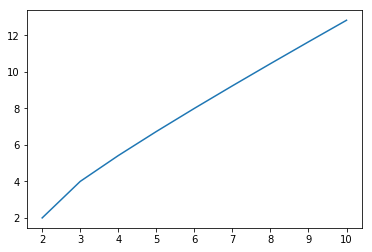

In [72]:
x = np.arange(2,11)
y = x + np.sqrt(x-2)
plt.plot(x,y)

#### Question 6.12

$2x^2 -22x + 85 = x^2 - 22x + 121$

$x^2 = 36$

x = 6, -6

#### Question 6.13

양변을 제곱하면

$\sqrt{(x+5)(5-x)} = 4$

$x^2-25 = -16$

x = 3,-3

#### Question 6.14

x > -3 과 x > 2 를 동시에 만족해야함.

양변을 제곱해서 전개하여 푸는방식이 있지만, 코딩으로 풀어보겠습니다.

In [78]:
x = np.arange(2, 100)
for i in x:
    if (np.sqrt(i+3)-1) == np.sqrt(i - np.sqrt(i-2)):
        print (i)x

SyntaxError: invalid syntax (<ipython-input-78-26d5120d05ce>, line 4)

#### Question 6.15


$u^2 = x$라 놓자.

In [75]:
np.roots([36, -13, 1])

array([0.25      , 0.11111111])

 $u^2 = \frac{1}{4}, \frac{1}{9}$이므로
 
$ u = \pm\frac{1}{2}, \pm\frac{1}{3}$

#### Question 6.16

$5x - \frac{4x}{5-x} = 4$

$5x(5-x) - 4x = 4(5-x)$

In [76]:
np.roots([-5, 25, -20])

array([4., 1.])